# Sample APP demonstration

**Details:**
    
    - python package: pyspark
    - Language model: Word2Vec (all errors)
    - Clustering algorithm: K-Means
    
**Mode:**

    - Word2Vec: training
    - K-Means: training (K optimized)

### Imports
Import libraries and write settings here.

In [1]:
from opint_framework.apps.example_app.nlp.luca.luca_nlp_adapter import LucaNLPAdapter
import pandas as pd
pd.set_option('display.max_colwidth', None)

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.4
      /_/

Using Python version 3.7.3 (default, Oct  7 2019 12:56:13)
SparkSession available as 'spark'.


# Analysis/Modeling
Do work here

## Instantiate NLPAdapter object

In [2]:
# setup sample data path
data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/luca/sample_data_5mar20.json"""

# instantiate NLPAdapter object
pipeline = LucaNLPAdapter(path_list=[data_path], vo="atlas",  # data
                          tks_col="stop_token_1",  # tokenization
                          w2v_model_path="results/w2v", w2v_mode="train", w2v_save_mode="overwrite", 
                          emb_size=3, win_size=8, min_count=1, tks_vec="message_vector",  # word2vec
                          ft_col="features", kmeans_model_path=None, kmeans_mode="train",
                          pred_mode="static", new_cluster_thresh=None, k_list=[2, 4, 6],
                          distance="cosine", opt_initSteps=10, opt_tol=0.0001, opt_maxIter=30, 
                          log_path="results/logs", n_cores=5, # K_optim
                          tr_initSteps=200, tr_tol=0.000001, tr_maxIter=100,  # train_kmeans
                          clust_col="prediction")

## Pre-processing 

In [3]:
pipeline.pre_process()

In [4]:
print("dataset type:", type(pipeline.context['dataset']))
print("dataset columns:", pipeline.context['dataset'].columns)
print("dataset entries:", pipeline.context['dataset'].count())

print("\nHead:\n")
pipeline.context['dataset'].toPandas().set_index(pipeline.context["id_col"]).head()

dataset type: <class 'pyspark.sql.dataframe.DataFrame'>
dataset columns: ['msg_id', 't__error_message', 'src_hostname', 'dst_hostname', 'timestamp_tr_comp']
dataset entries: 91

Head:



,t__error_message,src_hostname,dst_hostname,timestamp_tr_comp
msg_id,,,,
0,Error reported from srm_ifce : 2 [SE][Ls][SRM_INVALID_PATH] No such file or directory.,srm-eospublic.cern.ch,srm-public.cern.ch,0
1,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",gftp.t2.ucsd.edu,dcache-se-cms.desy.de,0
2,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",heplnx204.pp.rl.ac.uk,storm-fe-cms.cr.cnaf.infn.it,0
3,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: copy HTTP 500 : Unexpected server error: 500",se01.grid.cyfronet.pl,se.hpc.utfsm.cl,1583439822407
4,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: copy HTTP 404 : File not found",ccdavatlas.in2p3.fr,gftp01.ncg.ingrid.pt,1583423079983


## Run 

In [5]:
kmeans_model = pipeline.run()

Saving w2v model to: results/w2v/w2v_sample_app_example_VS=3_MC=1_WS=8
Saving training metrics to: results/logs/K-Means_optimization.txt
Saving training metrics to: results/logs/K-Means_optimization.txt
Saving training metrics to: results/logs/K-Means_optimization.txt
Saving training metrics to: results/best_K=4.txt


In [6]:
print("kmeans_model type:", type(kmeans_model))
print("kmeans_model keys:", kmeans_model.keys())

kmeans_model

kmeans_model type: <class 'dict'>
kmeans_model keys: dict_keys(['model', 'wsse', 'asw'])


{'model': KMeans_8c4f35337ebc,
 'wsse': 5.186076457280844,
 'asw': 0.7936796187342755}

In [7]:
print("Optimal number of clusters:", kmeans_model["model"].summary.k)
print("\nRaw predictions dataset:")

kmeans_model["model"].summary.predictions.toPandas().set_index(pipeline.context["id_col"]).head()

Optimal number of clusters: 4

Raw predictions dataset:


,t__error_message,corrected_message,tokens,tokens_cleaned,stop_token,stop_token_1,message_vector,features,prediction
msg_id,,,,,,,,,
0,Error reported from srm_ifce : 2 [SE][Ls][SRM_INVALID_PATH] No such file or directory.,Error reported from srm_ifce : 2 [SE][Ls][SRM_INVALID_PATH] No such file or directory.,"[error, reported, from, srm_ifce, :, 2, [se][ls][srm_invalid_path], no, such, file, or, directory.]","[error, reported, from, srm_ifce, , 2, [se][ls][srm_invalid_path], no, such, file, or, directory]","[error, reported, srm_ifce, , 2, [se][ls][srm_invalid_path], file, directory]","[error, reported, srm_ifce, 2, [se][ls][srm_invalid_path], file, directory]","[0.41349038055964876, 0.5750764736107418, 0.2741333693265915]","[0.41349038055964876, 0.5750764736107418, 0.2741333693265915]",2
1,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred","TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred","[transfer, transfer, canceled, because, the, gsiftp, performance, marker, timeout, of, 360, seconds, has, been, exceeded,, or, all, performance, markers, during, that, period, indicated, zero, bytes, transferred]","[transfer, transfer, canceled, because, the, gsiftp, performance, marker, timeout, of, 360, seconds, has, been, exceeded, or, all, performance, markers, during, that, period, indicated, zero, bytes, transferred]","[transfer, transfer, canceled, gsiftp, performance, marker, timeout, 360, seconds, exceeded, performance, markers, period, indicated, zero, bytes, transferred]","[transfer, transfer, canceled, gsiftp, performance, marker, timeout, 360, seconds, exceeded, performance, markers, period, indicated, zero, bytes, transferred]","[0.7002135112005121, -0.34239817498361363, -1.8316871856941896]","[0.7002135112005121, -0.34239817498361363, -1.8316871856941896]",1
2,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred","TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred","[transfer, transfer, canceled, because, the, gsiftp, performance, marker, timeout, of, 360, seconds, has, been, exceeded,, or, all, performance, markers, during, that, period, indicated, zero, bytes, transferred]","[transfer, transfer, canceled, because, the, gsiftp, performance, marker, timeout, of, 360, seconds, has, been, exceeded, or, all, performance, markers, during, that, period, indicated, zero, bytes, transferred]","[transfer, transfer, canceled, gsiftp, performance, marker, timeout, 360, seconds, exceeded, performance, markers, period, indicated, zero, bytes, transferred]","[transfer, transfer, canceled, gsiftp, performance, marker, timeout, 360, seconds, exceeded, performance, markers, period, indicated, zero, bytes, transferred]","[0.7002135112005121, -0.34239817498361363, -1.8316871856941896]","[0.7002135112005121, -0.34239817498361363, -1.8316871856941896]",1
3,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: copy HTTP 500 : Unexpected server error: 500","TRANSFER error: Copy failed with mode 3rd pull, with error: copy HTTP 500 : Unexpected server error: 500","[transfer, error:, copy, failed, with, mode, 3rd, pull,, with, error:, copy, http, 500, :, unexpected, server, error:, 500]","[transfer, error, copy, failed, with, mode, 3rd, pull, with, error, copy, http, 500, , unexpected, server, error, 500]","[transfer, error, copy, failed, mode, 3rd, pull, error, copy, http, 500, , unexpected, server, error, 500]","[transfer, error, copy, failed, mode, 3rd, pull, error, copy, http, 500, unexpected, server, error

# Results
Show graphs and stats here

## Post-processing

Saving time plots to: results/sample_app/K=4/timeplot
                  cannot be displayed for cluster 1
                  cannot be displayed for cluster 2


/home/luca/PycharmProjects/opint-framework/venv/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Saving clustering summary to: results/sample_app/K=4/summary.csv
Saving time plots to: results/sample_app/K=4/token_clouds


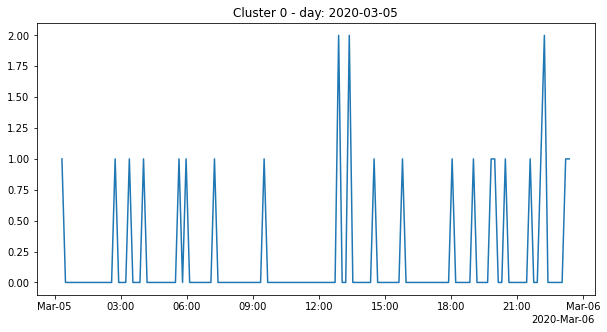

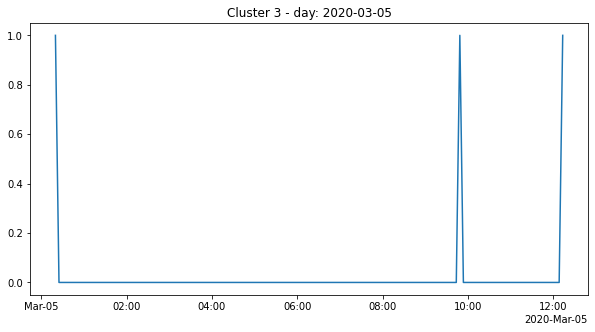

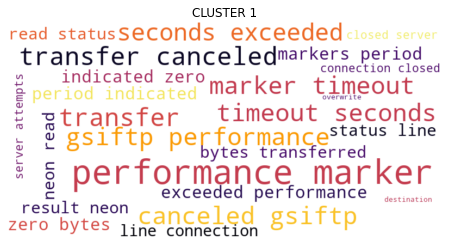

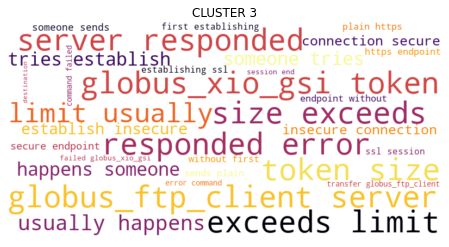

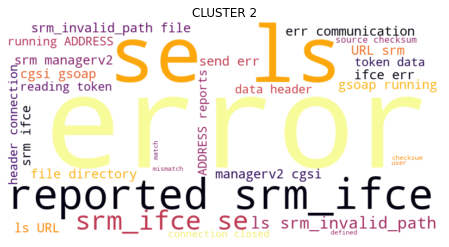

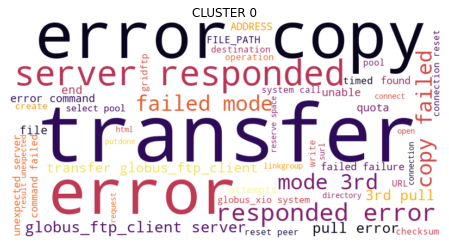

In [8]:
summary_table = pipeline.post_process(kmeans_model)

In [9]:
summary_table

,n_messages,unique_strings,unique_patterns,top_5_msg,top_5_src,top_5_dst
prediction,,,,,,
0,54,42,35,"[{'msg': 'transfer error copy failed with mode 3rd pull with error copy http 500 unexpected server error 500', 'n': 3, 'n_perc': 0.0556}, {'msg': 'transfer globus_ftp_client the server responded with an error 451 general problem problem while connected to \$ADDRESS connection reset by peer', 'n': 3, 'n_perc': 0.0556}, {'msg': 'transfer globus_ftp_client the server responded with an error 500 command failed open/create [error] server responded with an error [3021] unable to get quota space quota not defined or exhausted \$FILE_PATH disk quota exceeded', 'n': 3, 'n_perc': 0.0556}, {'msg': 'destination overwrite result http 502 unexpected server error 502 after 1 attempts', 'n': 2, 'n_perc': 0.037}, {'msg': 'destination srm_putdone error on the surl \$URL \$FILE_PATH while putdone [se][putdone][srm_invalid_path] this surl does not exist in the original request', 'n': 2, 'n_perc': 0.037}]","[{'src': 'CERN-PROD_SE_1_ATLAS', 'n': 10, 'n_perc': 0.1852}, {'src': 'BNL-ATLAS_SE', 'n': 5, 'n_perc': 0.0926}, {'src': 'UKI-NORTHGRID-MAN-HEP_SE_0_ATLAS', 'n': 3, 'n_perc': 0.0556}, {'src': 'CERN-PROD_SE_CMS', 'n': 2, 'n_perc': 0.037}, {'src': 'CYFRONET-LCG2_SE_0_ATLAS', 'n': 2, 'n_perc': 0.037}]","[{'dst': 'CERN-PROD_SE_1_ATLAS', 'n': 5, 'n_perc': 0.0926}, {'dst': 'BNL-ATLAS_SE', 'n': 4, 'n_perc': 0.0741}, {'dst': 'BNL-ATLAS_SE_0_ATLAS', 'n': 4, 'n_perc': 0.0741}, {'dst': None, 'n': 3, 'n_perc': 0.0556}, {'dst': 'EELA-UTFSM_SE_0_ATLAS', 'n': 3, 'n_perc': 0.0556}]"
1,14,3,3,"[{'msg': 'transfer transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded or all performance markers during that period indicated zero bytes transferred', 'n': 7, 'n_perc': 0.5}, {'msg': 'result (neon) could not read status line connection was closed by server after 1 attempts', 'n': 5, 'n_perc': 0.3571}, {'msg': 'destination overwrite result (neon) could not read status line connection was closed by server after 1 attempts', 'n': 2, 'n_perc': 0.1429}]","[{'src': 'FR-ALPES_SE_0_ATLAS', 'n': 5, 'n_perc': 0.3571}, {'src': None, 'n': 2, 'n_perc': 0.1429}, {'src': 'UKI-SOUTHGRID-RALPP_SE_0_ATLAS', 'n': 2, 'n_perc': 0.1429}, {'src': 'BNL-ATLAS_SE', 'n': 1, 'n_perc': 0.0714}, {'src': 'IFIC-LCG2_SE_0_ATLAS', 'n': 1, 'n_perc': 0.0714}]","[{'dst': None, 'n': 5, 'n_perc': 0.3571}, {'dst': 'AGLT2_SE', 'n': 3, 'n_perc': 0.2143}, {'dst': 'FR-ALPES_SE_0_ATLAS', 'n': 2, 'n_perc': 0.1429}, {'dst': 'CA-VICTORIA-WESTGRID-T2_SE', 'n': 1, 'n_perc': 0.0714}, {'dst': 'DESY-HH_SE', 'n': 1, 'n_perc': 0.0714}]"
2,12,8,4,"[{'msg': 'error reported from srm_ifce 2 [se][ls][srm_invalid_path] no such file or directory', 'n': 5, 'n_perc': 0.4167}, {'msg': 'srm-ifce err communication error on send err [se][ls][] \$URL /srm/managerv2 cgsi-gsoap running on \$ADDRESS reports error reading token data header connection closed', 'n': 5, 'n_perc': 0.4167}, {'msg': 'source checksum mismatch user defined checksum and source checksum do not match 386bbf65 != f773e2e9', 'n': 1, 'n_perc': 0.0833}, {'msg': 'source checksum mismatch user defined checksum and source checksum do not match 4146c283 != 0e34efaa', 'n': 1, 'n_perc': 0.0833}]","[{'src': 'CERN-PROD_SE', 'n': 5, 'n_perc': 0.4167}, {'src': 'CERN-PROD_SE_1_ATLAS', 'n': 2, 'n_perc': 0.1667}, {'src': 'FI_HIP_T2_SE_CMS', 'n': 1, 'n_perc': 0.0833}, {'src': 'IFCA-LCG2_SE_CMS', 'n': 1, 'n_perc': 0.0833}, {'src': 'INFN-PISA_SE', 'n': 1, 'n_perc': 0.0833}]","[{'dst': 'CERN-PROD_SE', 'n': 5, 'n_perc': 0.4167}, {'dst': 'CERN-PROD_SE_CMS', 'n': 3, 'n_perc': 0.25}, {'dst': 'INFN-GENOVA_SE_0_ATLAS', 'n': 1, 'n_perc': 0.0833}, {'dst': 'INFN-ROMA3_SE_0_ATLAS', 'n': 1, 'n_perc': 0.0833}, {'dst': 'KR-KNU-T3_SE_CMS', 'n': 1, 'n_perc': 0.0833}]"
3,11,5,5,"[{'msg': 'transfer globus_ftp_client the server responded with an error 500 500 command failed 500 globus_xio_gsi token size exceeds limit usually happens when someone tries to establish 

## All in one step 


NLP Adapter - PySpark_adapter: Pre Processing input data

NLP Adapter - PySpark_adapter: Executing vectorization, tokenization and clusterization
Saving w2v model to: results/w2v/w2v_sample_app_example_VS=3_MC=1_WS=8/w2v_sample_app_example_VS=3_MC=1_WS=8
Saving training metrics to: results/logs/K-Means_optimization.txt
Saving training metrics to: results/logs/K-Means_optimization.txt
Saving training metrics to: results/logs/K-Means_optimization.txt
Saving training metrics to: results/best_K=4.txt

NLP Adapter - PySpark_adapter: Post processing
Saving time plots to: results/sample_app/K=4/timeplot
                  cannot be displayed for cluster 0
                  cannot be displayed for cluster 3


/home/luca/PycharmProjects/opint-framework/venv/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Saving clustering summary to: results/sample_app/K=4/summary.csv
Saving time plots to: results/sample_app/K=4/token_clouds


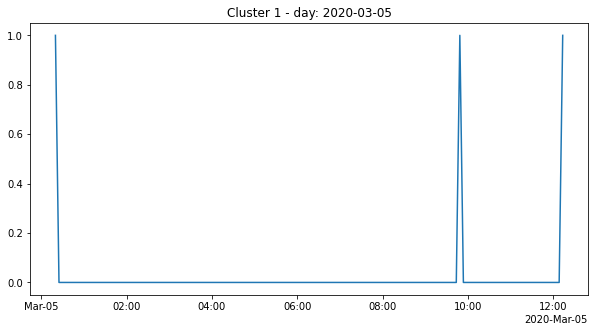

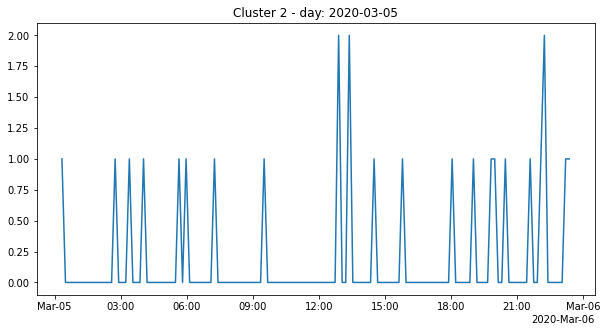

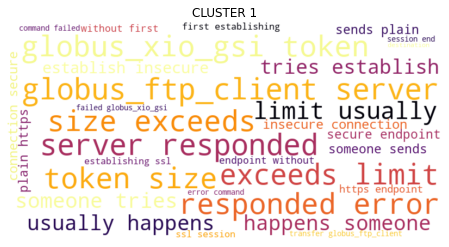

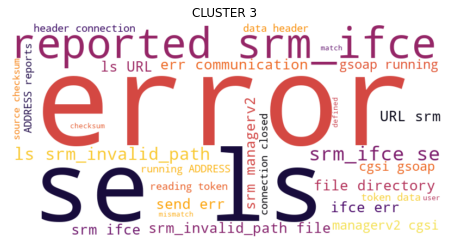

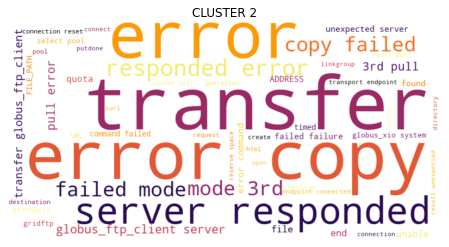

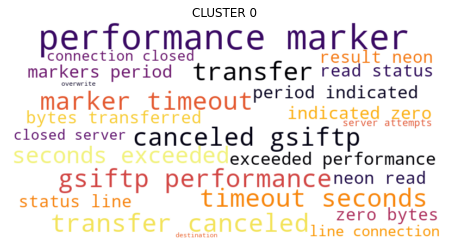

In [10]:
summary_table = pipeline.execute()

In [11]:
summary_table

,n_messages,unique_strings,unique_patterns,top_5_msg,top_5_src,top_5_dst
prediction,,,,,,
2,54,42,35,"[{'msg': 'transfer error copy failed with mode 3rd pull with error copy http 500 unexpected server error 500', 'n': 3, 'n_perc': 0.0556}, {'msg': 'transfer globus_ftp_client the server responded with an error 451 general problem problem while connected to \$ADDRESS connection reset by peer', 'n': 3, 'n_perc': 0.0556}, {'msg': 'transfer globus_ftp_client the server responded with an error 500 command failed open/create [error] server responded with an error [3021] unable to get quota space quota not defined or exhausted \$FILE_PATH disk quota exceeded', 'n': 3, 'n_perc': 0.0556}, {'msg': 'destination overwrite result http 502 unexpected server error 502 after 1 attempts', 'n': 2, 'n_perc': 0.037}, {'msg': 'destination srm_putdone error on the surl \$URL \$FILE_PATH while putdone [se][putdone][srm_invalid_path] this surl does not exist in the original request', 'n': 2, 'n_perc': 0.037}]","[{'src': 'CERN-PROD_SE_1_ATLAS', 'n': 10, 'n_perc': 0.1852}, {'src': 'BNL-ATLAS_SE', 'n': 5, 'n_perc': 0.0926}, {'src': 'UKI-NORTHGRID-MAN-HEP_SE_0_ATLAS', 'n': 3, 'n_perc': 0.0556}, {'src': 'CERN-PROD_SE_CMS', 'n': 2, 'n_perc': 0.037}, {'src': 'CYFRONET-LCG2_SE_0_ATLAS', 'n': 2, 'n_perc': 0.037}]","[{'dst': 'CERN-PROD_SE_1_ATLAS', 'n': 5, 'n_perc': 0.0926}, {'dst': 'BNL-ATLAS_SE', 'n': 4, 'n_perc': 0.0741}, {'dst': 'BNL-ATLAS_SE_0_ATLAS', 'n': 4, 'n_perc': 0.0741}, {'dst': None, 'n': 3, 'n_perc': 0.0556}, {'dst': 'EELA-UTFSM_SE_0_ATLAS', 'n': 3, 'n_perc': 0.0556}]"
0,14,3,3,"[{'msg': 'transfer transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded or all performance markers during that period indicated zero bytes transferred', 'n': 7, 'n_perc': 0.5}, {'msg': 'result (neon) could not read status line connection was closed by server after 1 attempts', 'n': 5, 'n_perc': 0.3571}, {'msg': 'destination overwrite result (neon) could not read status line connection was closed by server after 1 attempts', 'n': 2, 'n_perc': 0.1429}]","[{'src': 'FR-ALPES_SE_0_ATLAS', 'n': 5, 'n_perc': 0.3571}, {'src': None, 'n': 2, 'n_perc': 0.1429}, {'src': 'UKI-SOUTHGRID-RALPP_SE_0_ATLAS', 'n': 2, 'n_perc': 0.1429}, {'src': 'BNL-ATLAS_SE', 'n': 1, 'n_perc': 0.0714}, {'src': 'IFIC-LCG2_SE_0_ATLAS', 'n': 1, 'n_perc': 0.0714}]","[{'dst': None, 'n': 5, 'n_perc': 0.3571}, {'dst': 'AGLT2_SE', 'n': 3, 'n_perc': 0.2143}, {'dst': 'FR-ALPES_SE_0_ATLAS', 'n': 2, 'n_perc': 0.1429}, {'dst': 'CA-VICTORIA-WESTGRID-T2_SE', 'n': 1, 'n_perc': 0.0714}, {'dst': 'DESY-HH_SE', 'n': 1, 'n_perc': 0.0714}]"
3,12,8,4,"[{'msg': 'error reported from srm_ifce 2 [se][ls][srm_invalid_path] no such file or directory', 'n': 5, 'n_perc': 0.4167}, {'msg': 'srm-ifce err communication error on send err [se][ls][] \$URL /srm/managerv2 cgsi-gsoap running on \$ADDRESS reports error reading token data header connection closed', 'n': 5, 'n_perc': 0.4167}, {'msg': 'source checksum mismatch user defined checksum and source checksum do not match 386bbf65 != f773e2e9', 'n': 1, 'n_perc': 0.0833}, {'msg': 'source checksum mismatch user defined checksum and source checksum do not match 4146c283 != 0e34efaa', 'n': 1, 'n_perc': 0.0833}]","[{'src': 'CERN-PROD_SE', 'n': 5, 'n_perc': 0.4167}, {'src': 'CERN-PROD_SE_1_ATLAS', 'n': 2, 'n_perc': 0.1667}, {'src': 'FI_HIP_T2_SE_CMS', 'n': 1, 'n_perc': 0.0833}, {'src': 'IFCA-LCG2_SE_CMS', 'n': 1, 'n_perc': 0.0833}, {'src': 'INFN-PISA_SE', 'n': 1, 'n_perc': 0.0833}]","[{'dst': 'CERN-PROD_SE', 'n': 5, 'n_perc': 0.4167}, {'dst': 'CERN-PROD_SE_CMS', 'n': 3, 'n_perc': 0.25}, {'dst': 'INFN-GENOVA_SE_0_ATLAS', 'n': 1, 'n_perc': 0.0833}, {'dst': 'INFN-ROMA3_SE_0_ATLAS', 'n': 1, 'n_perc': 0.0833}, {'dst': 'KR-KNU-T3_SE_CMS', 'n': 1, 'n_perc': 0.0833}]"
1,11,5,5,"[{'msg': 'transfer globus_ftp_client the server responded with an error 500 500 command failed 500 globus_xio_gsi token size exceeds limit usually happens when someone tries to establish 

# Conclusions and Next Steps
Summarize findings here